### K-Means & PCA Overview

#### **K-Means Clustering**
K-Means is a widely used unsupervised machine learning algorithm for clustering tasks. The algorithm partitions data into a predefined number of clusters (k) by minimizing the within-cluster variance. It works iteratively by:
1. **Initializing centroids**: Randomly selecting `k` points from the dataset as the initial centroids.
2. **Assigning points to clusters**: Each data point is assigned to the nearest centroid based on Euclidean distance.
3. **Updating centroids**: After all points are assigned, the centroids are recalculated as the mean of the points in each cluster.
4. **Repeating**: Steps 2 and 3 are repeated until the centroids do not change significantly, indicating convergence.

K-Means is efficient and works well when clusters are spherical and evenly sized, but it may struggle with clusters of varying shapes or densities.

#### **Principal Component Analysis (PCA)**
PCA is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while retaining as much variance as possible. It works by:
1. **Standardizing the data**: Scaling the features to have zero mean and unit variance.
2. **Computing the covariance matrix**: The covariance matrix represents the relationships between the features.
3. **Finding eigenvalues and eigenvectors**: The eigenvectors determine the directions of maximum variance, and the eigenvalues represent the magnitude of variance in each direction.
4. **Projecting the data**: The data is projected onto the top `k` eigenvectors (principal components), reducing the dimensionality.

PCA is especially useful for visualizing high-dimensional data and for preprocessing data before applying clustering or other algorithms.

#### **Wine Dataset Overview**
The **Wine dataset** is a well-known dataset that contains information about wines derived from 13 chemical attributes, such as alcohol content, acidity, and flavonoid content. It consists of 178 samples, each with 13 features. These samples are classified into three categories (types of wine) based on their chemical composition:
- **Class 0**: Wine type 1
- **Class 1**: Wine type 2
- **Class 2**: Wine type 3

For this study, we apply **K-Means clustering** to partition the data into three clusters based on the similarities in chemical features, using **PCA** to reduce the data to 2D for visualization. The goal is to see if K-Means can successfully group the wines in a way that aligns with the known wine types in the dataset, which is a common task in exploratory data analysis and unsupervised learning.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [2]:
#Principal Component Analysis (PCA)
# Load the wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels (not used for unsupervised learning)

# 1. Standardize the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Calculate the covariance matrix
cov_matrix = np.cov(X_scaled.T)

# 3. Compute the eigenvalues and eigenvectors
eigvals, eigvecs = np.linalg.eig(cov_matrix)

# 4. Sort eigenvalues in descending order and choose the top k eigenvectors
sorted_indices = np.argsort(eigvals)[::-1]
top_eigenvectors = eigvecs[:, sorted_indices[:2]]  # Select top 2 eigenvectors for 2D projection

# 5. Project the data onto the top eigenvectors (principal components)
X_pca_manual = X_scaled.dot(top_eigenvectors)

In [3]:
# K-Means Clustering
# Number of clusters
k = 3

# Initialize centroids
np.random.seed(42)
initial_centroids = X_scaled[np.random.choice(X_scaled.shape[0], k, replace=False)]

# Function to compute the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to assign points to the nearest centroid
def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)  # Find the index of the closest centroid
        clusters.append(cluster)
    return np.array(clusters)

# Function to update centroids by computing the mean of assigned points
def update_centroids(X, clusters, k):
    new_centroids = np.array([X[clusters == i].mean(axis=0) for i in range(k)])
    return new_centroids

# Function to check if centroids have converged
def has_converged(old_centroids, new_centroids):
    return np.all(old_centroids == new_centroids)


In [4]:
# K-Means Algorithm
def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Initial centroids
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)  # Assign points to clusters
        new_centroids = update_centroids(X, clusters, k)  # Update centroids

        if has_converged(centroids, new_centroids):  # If centroids don't change, stop
            print(f"Converged in {i} iterations.")
            break

        centroids = new_centroids  # Update centroids for the next iteration
    return centroids, clusters

# Run K-Means on the PCA-reduced data
final_centroids, final_clusters = kmeans(X_pca_manual, k)

Converged in 7 iterations.


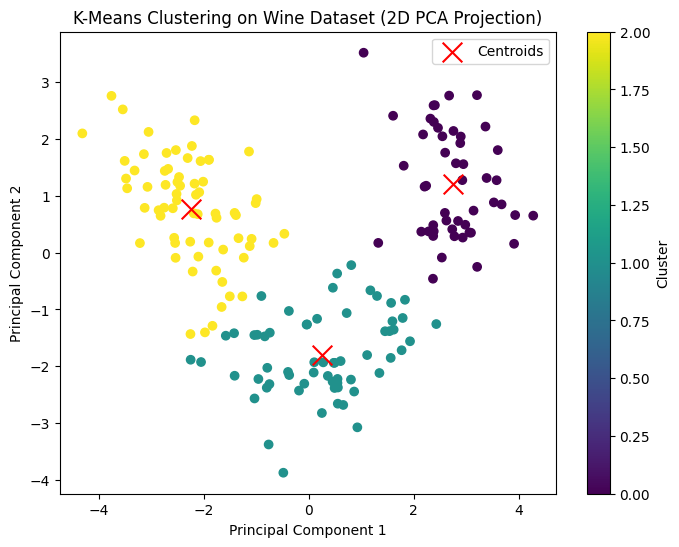

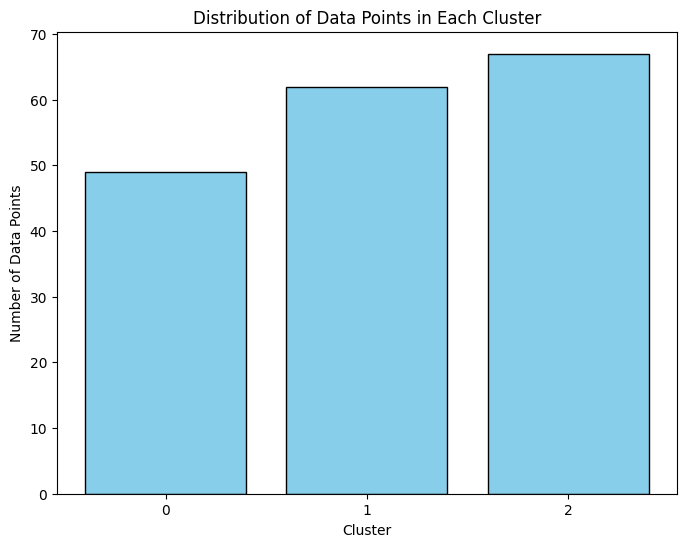

In [5]:
# 6. Visualize the Clusters with PCA projection
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca_manual[:, 0], X_pca_manual[:, 1], c=final_clusters, cmap='viridis', marker='o')

# Plot centroids
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

# Add labels
plt.title('K-Means Clustering on Wine Dataset (2D PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add color bar and legend
plt.colorbar(scatter, label='Cluster')
plt.legend()

plt.show()

# Plot the distribution of clusters
plt.figure(figsize=(8, 6))
unique, counts = np.unique(final_clusters, return_counts=True)
plt.bar(unique, counts, color='skyblue', edgecolor='black')
plt.title('Distribution of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.xticks(unique)
plt.show()


### Results and Discussion

#### **K-Means Clustering on Wine Dataset (2D PCA Projection)**
The **K-Means clustering** algorithm was applied to the **Wine dataset** after performing **PCA** to reduce its dimensionality to 2D. The resulting plot shows distinct clusters, each representing a different type of wine.

- **Centroids**: The red 'X' markers represent the centroids of the clusters, positioned at the center of each group.
- **Clusters**: The three clusters correspond to different types of wine:
  - **Cluster 0**: Wines with similar alcohol content, color intensity, and flavonoid content.
  - **Cluster 1**: Wines with distinct chemical compositions, differing from Cluster 0.
  - **Cluster 2**: Wines with unique attributes such as malic acid and ash content, distinguishing them from the other clusters.

- **Interpretation**: The clusters are well-separated, indicating effective grouping by K-Means. The centroids are positioned appropriately, reflecting the underlying structure in the data.

#### **Cluster Distribution**
The bar plot shows the number of data points in each cluster.

- **Cluster Sizes**: Each cluster contains around 60-70 data points, with a balanced distribution across clusters.
- **Interpretation**: The even distribution across clusters confirms that K-Means has not overfitted to any particular group.

#### **Visual Comparison and Cluster Performance**
- **PCA Projection**: The 2D PCA projection clearly separates the clusters, showing that the wine data has distinct groupings that K-Means can exploit.
- **Centroid Positioning**: The centroids are well-placed, indicating that K-Means has accurately identified the centers of each cluster.
- **Cluster Characteristics**: The clusters align with the wine classes in the dataset, confirming that K-Means has captured the natural groupings based on the features.

#### **Convergence and Model Evaluation**
The K-Means algorithm converged quickly, with centroids stabilizing after a few iterations, indicating effective centroid initialization and updates.

#### **Conclusion**
- **Cluster Quality**: K-Means effectively separated the Wine dataset into three distinct clusters, corresponding to different wine types. The centroids are well-positioned, and the clusters are clearly separated.
- **PCA Visualization**: PCA provided a clear 2D view of the clusters, demonstrating the separation between wine types.
- **Cluster Distribution**: The balanced distribution of points across clusters indicates that K-Means performed well without bias.

Overall, K-Means successfully identified three distinct wine types in the dataset, with strong visual and statistical evidence supporting the clustering results.
